In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w62qvCW3RCynC0IuUELg")
project = rf.workspace("garbage-w9jnq").project("garbage-classification-by-yolo")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install ultralytics

In [ ]:
import os


dataset_path = "/content/garbage-classification-by-yolo-1"

for split in ['train', 'valid', 'test']:
    image_dir = os.path.join(dataset_path, split, 'images')
    if os.path.exists(image_dir):
        num_images = len([f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        print(f"{split}: {num_images} images")
    else:
        print(f"{split}: ไม่พบรูปภาพขยะ")


train: 2517 images
valid: 240 images
test: 120 images


In [ ]:
from ultralytics import YOLO

# โหลดโมเดล YOLOv8
model = YOLO('yolov8n.pt')

model.train(data='/content/garbage-classification-by-yolo-1/data.yaml',
            epochs=50,
            imgsz=640,
            batch=16,
            name='yolov8_recyclable_model',
            save=True)


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/garbage-classification-by-yolo-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_recyclable_model3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

train: Scanning /content/garbage-classification-by-yolo-1/train/labels.cache... 2517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2517/2517 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 3555. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 409.0±127.4 MB/s, size: 38.5 KB)


val: Scanning /content/garbage-classification-by-yolo-1/valid/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 310. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/yolov8_recyclable_model3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_recyclable_model3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.11G      1.298      2.466      1.652         23        640: 100%|██████████| 158/158 [00:15<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        240        310      0.464      0.417       0.39      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.29G      1.367      1.954      1.674         22        640: 100%|██████████| 158/158 [00:14<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]

                   all        240        310      0.535      0.355      0.325      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.3G      1.412      1.854      1.699         28        640: 100%|██████████| 158/158 [00:13<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        240        310       0.49      0.459      0.426      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.417      1.749      1.704         19        640: 100%|██████████| 158/158 [00:13<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]

                   all        240        310      0.373      0.467      0.382      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.33G      1.376      1.648      1.662         24        640: 100%|██████████| 158/158 [00:13<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]

                   all        240        310      0.654      0.533      0.596      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.33G      1.344       1.53       1.64         14        640: 100%|██████████| 158/158 [00:13<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.14it/s]

                   all        240        310      0.559      0.578      0.541       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.34G      1.326      1.435      1.618         10        640: 100%|██████████| 158/158 [00:13<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]


                   all        240        310      0.611      0.588      0.639      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.35G      1.311        1.4      1.611         18        640: 100%|██████████| 158/158 [00:13<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]


                   all        240        310      0.703      0.604      0.654      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.35G      1.292      1.353       1.59         16        640: 100%|██████████| 158/158 [00:13<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]

                   all        240        310      0.622      0.592      0.625      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.35G      1.271      1.278      1.574         18        640: 100%|██████████| 158/158 [00:13<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.23it/s]

                   all        240        310      0.695      0.602      0.667      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.35G      1.264      1.269      1.565         18        640: 100%|██████████| 158/158 [00:13<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]


                   all        240        310      0.657      0.616      0.669      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.35G      1.272      1.215      1.563         12        640: 100%|██████████| 158/158 [00:13<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]


                   all        240        310      0.737      0.636      0.707      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.35G      1.234      1.198      1.548         21        640: 100%|██████████| 158/158 [00:13<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.32it/s]


                   all        240        310      0.634      0.687      0.699      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.35G      1.239      1.154      1.546         33        640: 100%|██████████| 158/158 [00:13<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]

                   all        240        310      0.758      0.714      0.774      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.35G      1.224       1.13       1.52         12        640: 100%|██████████| 158/158 [00:13<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.47it/s]


                   all        240        310      0.752      0.675      0.739      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.35G      1.198      1.075      1.516         12        640: 100%|██████████| 158/158 [00:13<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.16it/s]

                   all        240        310      0.751      0.656       0.75      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.35G      1.192      1.046      1.506         20        640: 100%|██████████| 158/158 [00:13<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]

                   all        240        310      0.665      0.656      0.684      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.36G      1.194      1.055      1.496         21        640: 100%|██████████| 158/158 [00:13<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]


                   all        240        310      0.771      0.646       0.73      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G      1.175      1.038      1.492         10        640: 100%|██████████| 158/158 [00:13<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        240        310      0.686      0.747      0.746      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.36G       1.17      1.007      1.488         15        640: 100%|██████████| 158/158 [00:14<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]

                   all        240        310      0.755      0.719      0.779      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G      1.155     0.9724      1.478         13        640: 100%|██████████| 158/158 [00:13<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]


                   all        240        310      0.771      0.657       0.78      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.36G      1.171     0.9914      1.485         16        640: 100%|██████████| 158/158 [00:13<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]

                   all        240        310      0.717      0.734      0.768      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.36G      1.119     0.9497      1.458         15        640: 100%|██████████| 158/158 [00:13<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.40it/s]

                   all        240        310      0.703      0.679      0.742      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.36G      1.137     0.9375      1.464         21        640: 100%|██████████| 158/158 [00:13<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]

                   all        240        310      0.753      0.723       0.78      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.36G      1.135     0.9316      1.457         12        640: 100%|██████████| 158/158 [00:13<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]

                   all        240        310      0.787      0.717      0.804        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.36G      1.139     0.9192      1.458         20        640: 100%|██████████| 158/158 [00:13<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]


                   all        240        310       0.74       0.69      0.751      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.36G      1.105     0.8687      1.441         15        640: 100%|██████████| 158/158 [00:13<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]


                   all        240        310      0.766      0.659      0.753      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.36G      1.105     0.8791      1.437         15        640: 100%|██████████| 158/158 [00:13<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]


                   all        240        310      0.755      0.799      0.799        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.36G      1.092     0.8583      1.434         12        640: 100%|██████████| 158/158 [00:13<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.74it/s]


                   all        240        310      0.732       0.78      0.784      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.36G      1.098     0.8417      1.416         15        640: 100%|██████████| 158/158 [00:13<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]

                   all        240        310      0.817       0.77      0.816       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.36G      1.061      0.817      1.401         13        640: 100%|██████████| 158/158 [00:13<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]

                   all        240        310      0.844      0.737      0.815      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.36G      1.074       0.81      1.403         18        640: 100%|██████████| 158/158 [00:13<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]

                   all        240        310      0.806      0.751      0.827      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.36G      1.056     0.8029      1.402         13        640: 100%|██████████| 158/158 [00:13<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.22it/s]

                   all        240        310       0.81      0.714      0.792      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.36G      1.034     0.7808       1.38         15        640: 100%|██████████| 158/158 [00:13<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.69it/s]

                   all        240        310      0.807      0.765      0.831      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.36G      1.042     0.7754      1.384         12        640: 100%|██████████| 158/158 [00:13<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]

                   all        240        310      0.819      0.738      0.803      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.36G      1.022      0.757      1.384         18        640: 100%|██████████| 158/158 [00:13<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.79it/s]

                   all        240        310       0.78      0.813      0.836      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.36G      1.022     0.7448      1.376         21        640: 100%|██████████| 158/158 [00:13<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.62it/s]


                   all        240        310      0.796      0.774      0.817      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.36G      1.018     0.7416      1.358         14        640: 100%|██████████| 158/158 [00:13<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.63it/s]

                   all        240        310      0.814       0.78      0.833      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.36G     0.9945     0.7208      1.363         16        640: 100%|██████████| 158/158 [00:13<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.75it/s]


                   all        240        310      0.812      0.808      0.841      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.36G     0.9921     0.7107      1.344         13        640: 100%|██████████| 158/158 [00:13<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.90it/s]

                   all        240        310       0.84      0.758      0.834      0.525


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.36G     0.8996     0.5813      1.427          5        640: 100%|██████████| 158/158 [00:14<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        240        310      0.794      0.788      0.828      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.36G     0.8787     0.5486      1.407          6        640: 100%|██████████| 158/158 [00:13<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.26it/s]

                   all        240        310      0.803      0.808      0.849      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.36G     0.8515      0.535      1.387          6        640: 100%|██████████| 158/158 [00:13<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.39it/s]

                   all        240        310       0.79      0.802      0.836      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.36G     0.8511     0.5074      1.366          6        640: 100%|██████████| 158/158 [00:13<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.59it/s]

                   all        240        310      0.778      0.829      0.839      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.36G     0.8284     0.5015       1.36          7        640: 100%|██████████| 158/158 [00:13<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.71it/s]

                   all        240        310      0.816      0.798      0.842      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.36G     0.8039     0.5004      1.347         10        640: 100%|██████████| 158/158 [00:13<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]

                   all        240        310      0.793      0.788      0.833      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.36G     0.8089      0.486       1.34          7        640: 100%|██████████| 158/158 [00:13<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]

                   all        240        310      0.806      0.829      0.838      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.36G     0.7843     0.4704      1.326          7        640: 100%|██████████| 158/158 [00:13<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]

                   all        240        310      0.856        0.8      0.851      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.36G     0.7811     0.4651      1.321          5        640: 100%|██████████| 158/158 [00:13<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]

                   all        240        310      0.828      0.806      0.849      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.36G     0.7637     0.4484      1.309          5        640: 100%|██████████| 158/158 [00:13<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.65it/s]

                   all        240        310      0.841      0.817      0.854      0.555



50 epochs completed in 0.207 hours.
Optimizer stripped from runs/detect/yolov8_recyclable_model3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_recyclable_model3/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_recyclable_model3/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]


                   all        240        310      0.843      0.815      0.854      0.556
                 glass         60         79      0.894      0.854      0.898      0.614
                 metal         60         86      0.746      0.826      0.784      0.489
                 paper         60         71      0.873      0.771      0.834      0.494
               plastic         60         74      0.859      0.811      0.899      0.625
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/yolov8_recyclable_model3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6b4dd78890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 951.1±369.6 MB/s, size: 44.3 KB)


val: Scanning /content/garbage-classification-by-yolo-1/test/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 158. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]


                   all        120        158      0.858      0.789      0.867      0.536
                 glass         30         43      0.924      0.767      0.908      0.553
                 metal         30         45       0.86       0.68      0.869      0.532
                 paper         30         35      0.823      0.796      0.772      0.454
               plastic         30         35      0.825      0.914      0.918      0.605
Speed: 1.8ms preprocess, 1.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val7


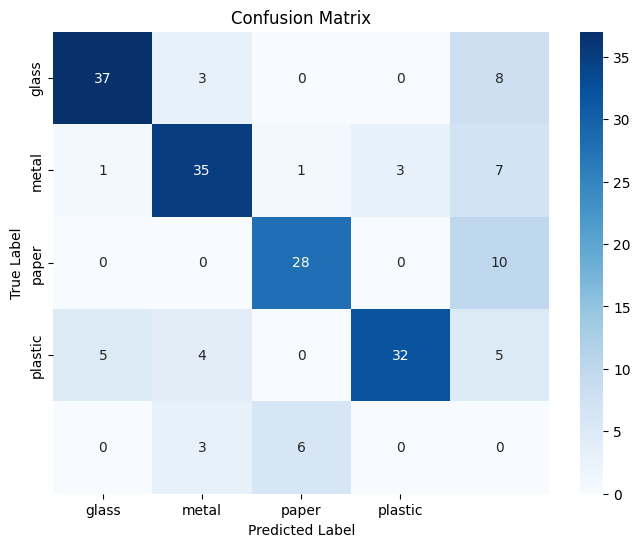

In [ ]:
from ultralytics import YOLO
import seaborn as sns
import matplotlib.pyplot as plt

model = YOLO('runs/detect/yolov8_recyclable_model/weights/best.pt')
metrics = model.val(data='/content/garbage-classification-by-yolo-1/data.yaml', split='test')

labels = metrics.names

if isinstance(labels, dict):
    labels = [labels[i] for i in range(len(labels))]

confusion_matrix = metrics.confusion_matrix.matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
